In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

In [24]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [27]:
cancer = pd.read_csv('survey_lung_cancer.csv')

In [28]:
cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [29]:
cancer.shape

(309, 16)

In [30]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [31]:
cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
cancer['LUNG_CANCER'] = lb.fit_transform(cancer['LUNG_CANCER']) # Change "Yes" to 1 and "No" to 0. 

In [33]:
cancer['GENDER'] = lb.fit_transform(cancer['GENDER'])

In [34]:
cancer['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

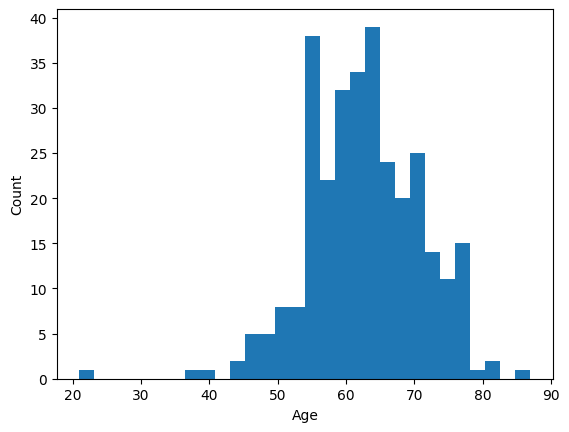

In [35]:
plt.hist(cancer["AGE"], bins = 30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [36]:
cancer = cancer[cancer.AGE > 30] # Remove the outlier, which is a participant of age 20+. 

In [37]:
cancer_without_age = cancer.drop(["AGE"], axis = 1)
for i in cancer_without_age.columns: 
    print(cancer_without_age[i].value_counts())

GENDER
1    162
0    146
Name: count, dtype: int64
SMOKING
2    173
1    135
Name: count, dtype: int64
YELLOW_FINGERS
2    176
1    132
Name: count, dtype: int64
ANXIETY
2    154
1    154
Name: count, dtype: int64
PEER_PRESSURE
2    155
1    153
Name: count, dtype: int64
CHRONIC DISEASE
2    155
1    153
Name: count, dtype: int64
FATIGUE 
2    207
1    101
Name: count, dtype: int64
ALLERGY 
2    171
1    137
Name: count, dtype: int64
WHEEZING
2    172
1    136
Name: count, dtype: int64
ALCOHOL CONSUMING
2    172
1    136
Name: count, dtype: int64
COUGHING
2    179
1    129
Name: count, dtype: int64
SHORTNESS OF BREATH
2    197
1    111
Name: count, dtype: int64
SWALLOWING DIFFICULTY
1    163
2    145
Name: count, dtype: int64
CHEST PAIN
2    172
1    136
Name: count, dtype: int64
LUNG_CANCER
1    270
0     38
Name: count, dtype: int64


<Axes: >

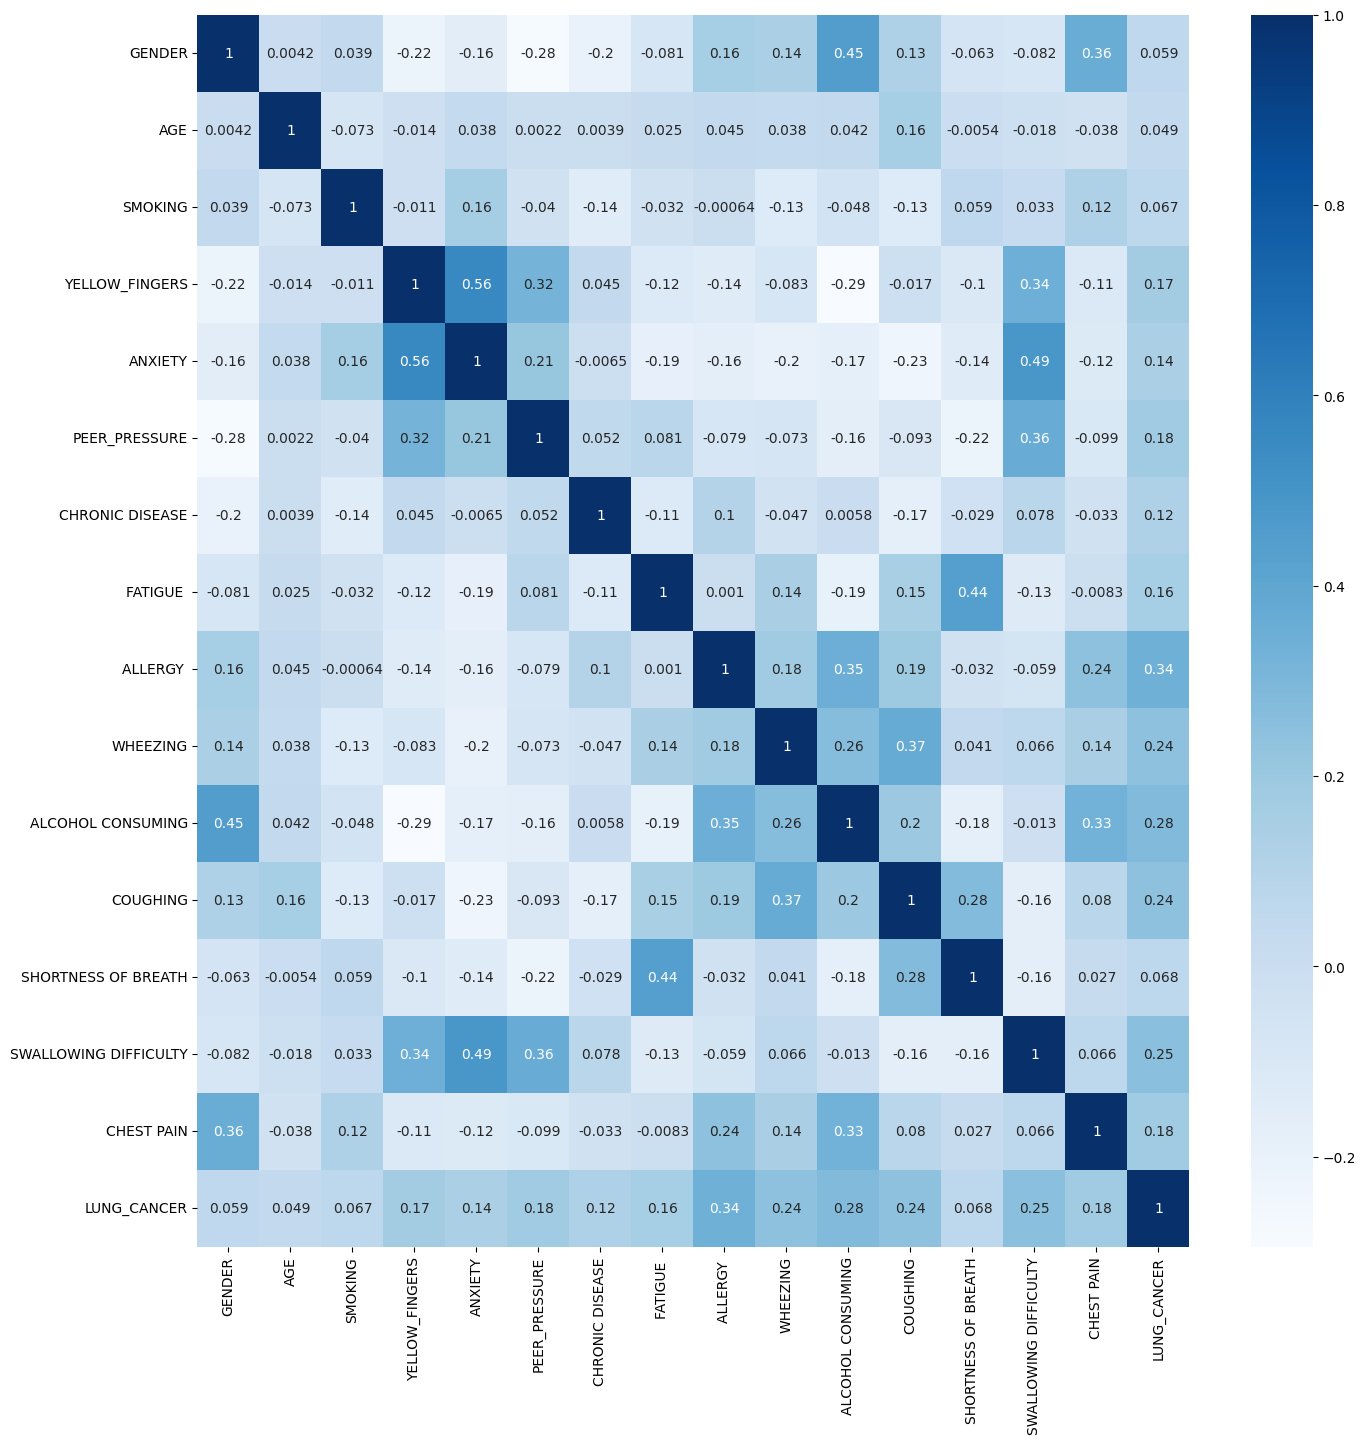

In [38]:
plt.figure(figsize = (16,16))
sns.heatmap(cancer.corr(), annot = True, cmap = "Blues")

In [ ]:
#Prediction Model - K Nearest Neighbor for Classification

In [39]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [40]:
x_train, x_test, y_train, y_test = train_test_split(cancer.drop('LUNG_CANCER', axis = 1), cancer['LUNG_CANCER'], test_size = 0.3)

In [41]:
# Experiment with n_neighbors = 10
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
y_pred = knn.predict(x_test)

In [43]:
print(confusion_matrix(y_test,y_pred))

[[ 2 12]
 [ 2 77]]


In [44]:
print(accuracy_score(y_test, y_pred))

0.8494623655913979


In [45]:
# Find an optimal number of neighbors with the lowest error rate 
error = []
for i in range(1,30): 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

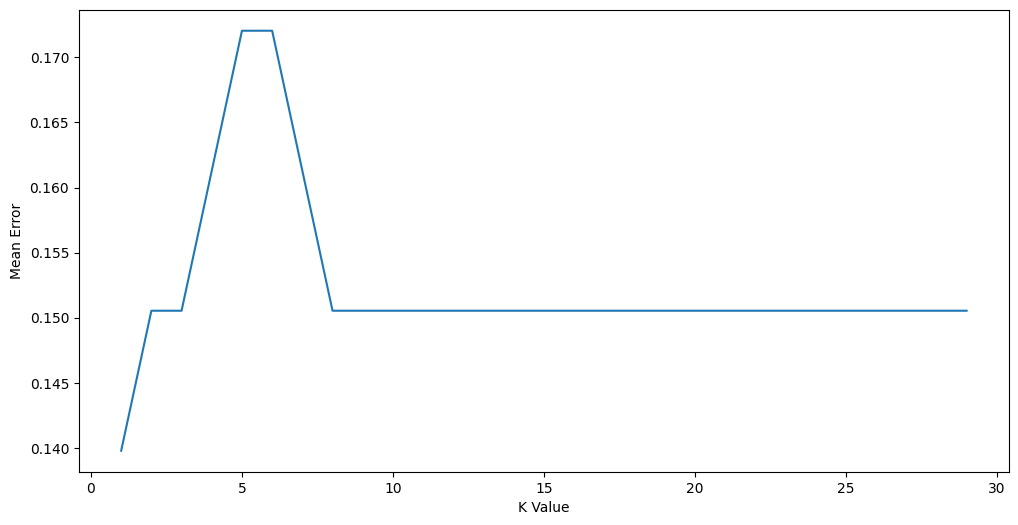

In [46]:
plt.figure(figsize = (12,6))
plt.plot(range(1,30), error)
plt.xlabel("K Value")
plt.ylabel("Mean Error")
plt.show()